<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/cifar10_ImageClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import basic packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#download cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
#shape of data
print('Shape of train images:',train_images.shape)
print('Shape of test images:',test_images.shape)

Shape of train images: (50000, 32, 32, 3)
Shape of test images: (10000, 32, 32, 3)


In [ ]:
print(train_images)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
print(test_images)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [ ]:
#normalize the pixel values to be between 0 to 1
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
#show normalized values
print('Normalized train image:',train_images[0])
print('Normalized test image:',test_images[0])

Normalized train image: [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137

In [2]:
#define class names according to cifar10 dataset
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

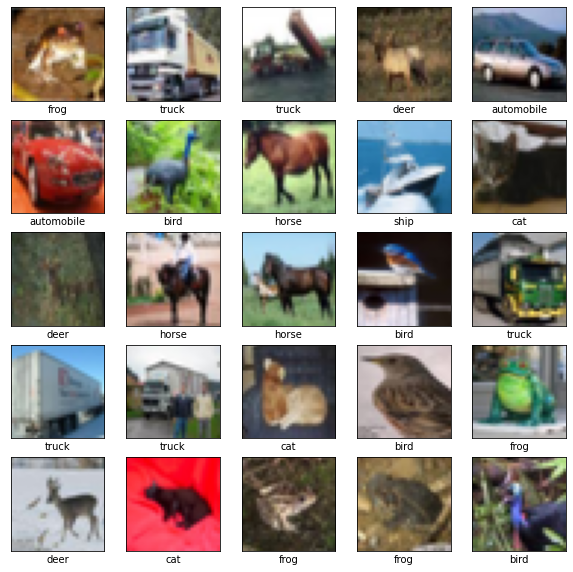

In [ ]:
#show 1st 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#Create convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [ ]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
#add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5532 - accuracy: 0.4305 - val_loss: 1.2554 - val_accuracy: 0.5434
Epoch 2/20
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1988 - accuracy: 0.5715 - val_loss: 1.1256 - val_accuracy: 0.6043
Epoch 3/20
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0530 - accuracy: 0.6303 - val_loss: 1.0325 - val_accuracy: 0.6350
Epoch 4/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9581 - accuracy: 0.6619 - val_loss: 0.9803 - val_accuracy: 0.6529
Epoch 5/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8958 - accuracy: 0.6834 - val_loss: 1.0042 - val_accuracy: 0.6535
Epoch 6/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8410 - accuracy: 0.7039 - val_loss: 1.0190 - val_accuracy: 0.6507
Epoch 7/20
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7925 - accuracy: 0.7225 - val_loss: 0.9051 -

313/313 - 4s - loss: 0.9673 - accuracy: 0.7030 - 4s/epoch - 13ms/step
Loss: 0.967255175113678
Accuracy: 0.703000009059906


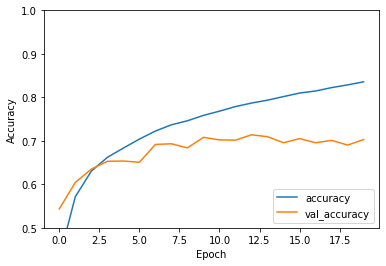

In [ ]:
#evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_accu = model.evaluate(test_images, test_labels, verbose=2)
print('Loss:',test_loss)
print('Accuracy:',test_accu)

In [ ]:
# save the model and architecture to a single file
model.save("cifar10Classification.h5")

In [23]:
# load model
from tensorflow.keras.models import load_model
imgClassifier = load_model('/content/cifar10Classification.h5')

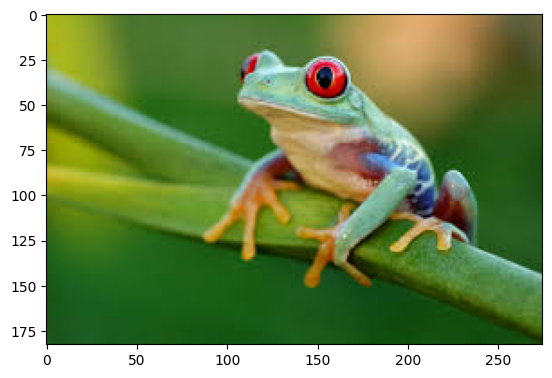

In [24]:
#Loading test data
import cv2
test_img = cv2.imread('/content/images (1).jpeg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img, cmap=plt.cm.binary)
test_img = cv2.resize(test_img, (32, 32))

Resized image:


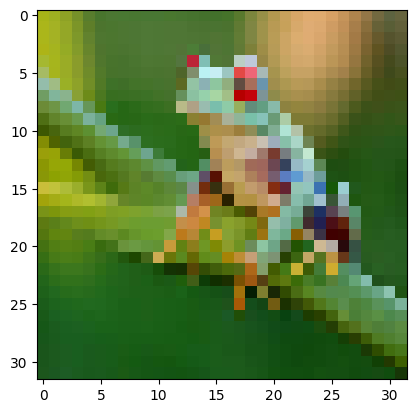

In [25]:
#Resized image
print('Resized image:')
plt.imshow(test_img, cmap=plt.cm.binary)

In [28]:
#Shape of Resized image
test_img.shape

(32, 32, 3)

In [27]:
#Prediction
import numpy as np

prediction = imgClassifier.predict(np.array([test_img])/255.0)
index = np.argmax(prediction)
print('Prediction is',class_names[index])

1/1 [==============================] - 0s 81ms/step
Prediction is frog
